Reading package lists... Done
Building dependency tree       
Reading state information... Done
dvipng is already the newest version (1.15-1).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


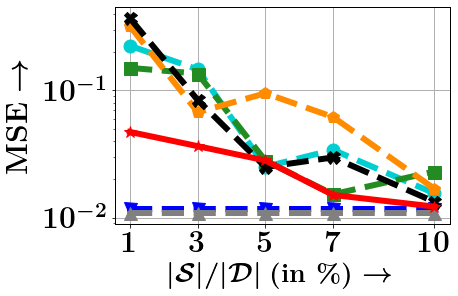

In [16]:
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended 
!apt install cm-super
!pip install brewer2mpl

import pickle

### FOR DEEP

#dataset = 'NY_Stock_exchange_high'
#dataset = 'NY_Stock_exchange_close'

#dataset = 'cadata'
dataset = 'LawSchool'

#file="/content/NY_Stock_exchange_high_deep.pkl"
#file="/content/NY_Stock_exchange_close_deep.pkl"
#file="/content/cadata_deep.pkl"
file="/content/LawSchool_deep.pkl"


ts_size = {'cadata':2064, 'LawSchool':2080, 'MSD': 51630, 'NY_Stock_exchange_close': 78084,
          'NY_Stock_exchange_high':78084}
nn = ts_size[dataset]
openfile = open(file, "rb")
score_dict = pickle.load(openfile)
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)

def latexify():
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bbm}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amssymb}"]


    plt.rc('axes', linewidth=1)
    plt.rc('font', weight='bold')
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

score_dict['S']
score_dict['mean_error'].keys()

methods = ['Full', 'Full with Constraints', 'Random',\
            'Random with Constraints', 'GLISTER', 'CRAIG','SELCON without Constraints',\
            'SELCON'] 

color_list = [(0, 0, 1),'gray', 'darkturquoise','forestgreen','darkorange','purple',
            (0,0,0),(1, 0, 0),'gold',
            (1.0, 0.8509803921568627, 0.1843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
            (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
            (0.4, 0.7607843137254902, 0.6470588235294118),
            (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
            (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
            (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),]
marker_list = ['v','^','o','s','p','d','X','*',] #
 
#print(score_dict['mean_error']['GLISTER'])

import numpy as np
latexify()

i=-1
fig, ax = plt.subplots()
for baseline in methods:# score_dict['mean_error'].keys():
    i=i+1
 
    if baseline == 'SELCON': 
        ax.errorbar(score_dict['S'],score_dict['mean_error'][baseline],score_dict['std_dev'][baseline]/np.sqrt(nn),\
            linewidth=6, 
                markersize=13, marker= marker_list[i],color=color_list[i])
    elif baseline == 'CRAIG': 
        continue
    else:
        '''if dataset == 'LawSchool':
            score_dict['mean_error'][baseline]\
             = np.convolve(score_dict['mean_error'][baseline], np.ones(3), 'valid') / 3
            score_dict['mean_error'][baseline]\
             =np.append(score_dict['mean_error'][baseline],score_dict['mean_error'][baseline][-1])
            score_dict['mean_error'][baseline]\
             =np.append(score_dict['mean_error'][baseline],score_dict['mean_error'][baseline][-1])'''
            
        ax.errorbar(score_dict['S'],score_dict['mean_error'][baseline],score_dict['std_dev'][baseline]/np.sqrt(nn),\
            linewidth=6,linestyle='dashed',
                markersize=13, marker= marker_list[i],color=color_list[i])

    #plt.xlabel(r'$|\mathcal{S}|$  \textbf{(in \%)} $\rightarrow$', fontsize=27)
    
    plt.xlabel(r'$|\mathcal{S}|/|\mathcal{D}|$  \textbf{(in \%)} $\rightarrow$', fontsize=27)
    
 
 
    #ax.legend(prop={'size': 22}, frameon=False,handlelength=0.4)

    plt.ylabel(r'$\mathrm{MSE}\rightarrow$ ', fontsize=30, labelpad=10)

    plt.yscale("log")
    plt.grid(axis='y',linestyle='-', linewidth=1)
    plt.grid(axis='x',linestyle='-', linewidth=1)

    if dataset is 'NY_Stock_exchange_high':
        plt.xticks([0.1,0.3,0.5,0.7,1])
        #plt.yticks([0,2e-5,4e-5,6e-5,8e-5],[r'\textbf{0.0}',r'\textbf{2.00}',r'\textbf{4.00}',r'\textbf{6.00}',r'\textbf{8.00}'])
        #plt.text(0.08, 8e-5, r'$ \times 10^{-5}$', fontsize=27)


    if dataset is 'NY_Stock_exchange_close':
        plt.xticks([0.1,0.3,0.5,0.7,1])
        #plt.yticks([1e-5,1e-4])
        #plt.yticks([0,2e-5,4e-5,6e-5,8e-5],[r'\textbf{0.0}',r'\textbf{2.00}',r'\textbf{4.00}',r'\textbf{6.00}',r'\textbf{8.00}'])
        #plt.text(0.08, 8e-5, r'$ \times 10^{-5}$', fontsize=27)
        #plt.ylim(top=9e-5)'''

    if dataset is 'cadata':
        plt.xticks([1,3,5,7,10])
        #plt.yticks([1e-5,1e-4])
        plt.yticks([1,.6,.4,.3],[r'\textbf{1.0}',r'\textbf{0.6}',r'\textbf{0.4}',r'\textbf{0.3}'])
        #plt.text(0.08, 8e-5, r'$ \times 10^{-5}$', fontsize=27)
        #plt.ylim(top=9e-5)'''

    if dataset is 'LawSchool':
        plt.xticks([1,3,5,7,10])
        #plt.yticks([1e-5,1e-4])
        #plt.yticks([1,.6,.4,.3],[r'\textbf{1.0}',r'\textbf{0.6}',r'\textbf{0.4}',r'\textbf{0.3}'])
        #plt.text(0.08, 8e-5, r'$ \times 10^{-5}$', fontsize=27)
        #plt.ylim(top=9e-5)'''

    plt.box(on=True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

#     ax.set_title(r'\textbf{Gain} = $\textbf{AP}($\textsc{PermGNN})-$\textbf{AP}($\textbf{baseline})', fontsize=19)
    pic = dataset+"_acc_deep.pdf"
    plt.savefig(pic, bbox_inches='tight')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
dvipng is already the newest version (1.15-1).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


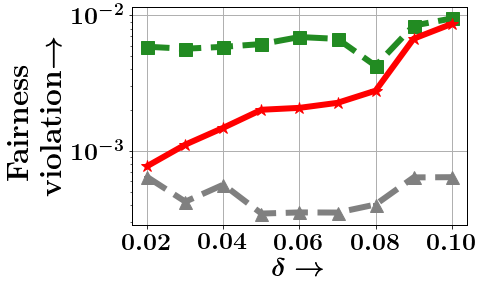

In [ ]:
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended 
!apt install cm-super
!pip install brewer2mpl

import pickle

#from Util import *

##FOR FAIRNESS

#dataset = 'Comm_Crime'
dataset = 'LawSchool'

#file=dataset
file = '/content/LawSchool_fair.pkl'
#file = '/content/Comm_Crime_fair.pkl'
ts_size = {'cadata':2064, 'LawSchool':2080, 'MSD': 51630, 'NY_Stock_exchange_close': 78084,
          'NY_Stock_exchange_high':78084,'Comm_Crime':199}

nn = ts_size[dataset]
openfile = open(file, "rb")
score_dict = pickle.load(openfile)
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
color_list = bmap.mpl_colors
color_list = [(0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
             (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
             (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
             (1.0, 0.8509803921568627, 0.1843137254901961),
             (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
             (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

color_list = [(1, 0, 0),
             (0, 0, 1),
              (0,0,0),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0,0,0),
#              (0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),]



def latexify():
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=25)
    plt.rc('ytick', labelsize=25)
    matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bbm}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amssymb}"]


    plt.rc('axes', linewidth=1)
    plt.rc('font', weight='bold')
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

 

# methods = ['Full-selection', 'Full-with-constraints', 'Random',\
#             'Random-with-constraints', 'CRAIG', 'GLISTER', 'SELCON-without-constraints',\
#             'SELCON']
score_dict['Delta']
score_dict['mean_error'].keys()

methods = ["Random with Constraints",'SELCON','Full with Contraints']##,'Random','SELCON without Constraints'] #'Full',

color_list = ['darkturquoise','forestgreen','mediumvioletred','darkorange',
            (0,0,0),(0,0.576, 0.68),(0, 0, 1), (1, 0, 0),'gold',
            (1.0, 0.8509803921568627, 0.1843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
            (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
            (0.4, 0.7607843137254902, 0.6470588235294118),
            (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
            (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
            (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),]

color_list = ['forestgreen',(1, 0, 0),'gray','darkturquoise',(0,0,0),
            'gold',(1, 0, 0),'darkorange', 'purple',
            (1.0, 0.8509803921568627, 0.1843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
            (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
            (0.4, 0.7607843137254902, 0.6470588235294118),
            (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
            (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
            (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),]
#(0, 0, 1),'gray', 'darkturquoise','forestgreen','purple','darkorange',(0,0,0),(1, 0, 0),'gold',
#marker_list = ['v','^','o','s','d','p','X','*'] 
marker_list = ['s','*','^','o','X','v','d','p']  

import numpy as np
latexify()

#select = [1,3,5,7,9]

i=-1
fig, ax = plt.subplots()
for baseline in methods:# score_dict['mean_error'].keys():
  
    i=i+1
 
    if baseline == 'SELCON': 
        ax.errorbar(score_dict['Delta'][1:],score_dict['mean_error'][baseline][1:],score_dict['std_dev'][baseline][1:]/np.sqrt(nn),\
            linewidth=6, markersize=13, marker= marker_list[i],color=color_list[i])
    else:
        '''if dataset == 'LawSchool':
              score_dict['mean_error'][baseline]\
                = np.convolve(score_dict['mean_error'][baseline], np.ones(3), 'valid') / 3
              score_dict['mean_error'][baseline]\
                =np.append(score_dict['mean_error'][baseline],score_dict['mean_error'][baseline][-1])
              score_dict['mean_error'][baseline]\ 
                =np.append(score_dict['mean_error'][baseline],score_dict['mean_error'][baseline][-1])'''
           
        ax.errorbar(score_dict['Delta'][1:],score_dict['mean_error'][baseline][1:],\
                    score_dict['std_dev'][baseline][1:]/np.sqrt(nn),linewidth=6,linestyle='dashed',\
                    markersize=13, marker= marker_list[i],color=color_list[i])

plt.xlabel(r'\textbf{$\delta$} $\rightarrow$', fontsize=27)


#ax.legend(prop={'size': 22}, frameon=False,handlelength=0.4)

plt.ylabel(r'\textbf{Fairness \newline \newline violation}$\rightarrow$ ', fontsize=30, labelpad=10)

plt.yscale("log")
plt.grid(axis='y',linestyle='-', linewidth=1)
plt.grid(axis='x',linestyle='-', linewidth=1)

if dataset == 'LawSchool':
  plt.xticks(score_dict['Delta'][select])
  plt.yticks([1e-2,1e-3])#,[r'\textbf{6.0}',r'\textbf{4.0}',r'\textbf{3.0}',r'\textbf{2.0}'])
  #plt.text(0.01, 10e-2, r'$ \times 10^{-2}$', fontsize=27)
  #plt.ylim(bottom=1.0e-2,top=9e-2)
elif dataset == 'Comm_Crime':
  plt.xticks(score_dict['Delta'][select])
  plt.yticks([3e-2, 2e-2,1.3e-2,8e-3,6e-3],[r'\textbf{3.0}',r'\textbf{2.0}',r'\textbf{1.3}',r'\textbf{0.8}',r'\textbf{0.6}'])
  plt.text(0.01, 4.2e-2, r'$ \times 10^{-2}$', fontsize=27)
  plt.ylim(bottom=5.8e-3,top=3.9e-2)

plt.box(on=True)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

#     ax.set_title(r'\textbf{Gain} = $\textbf{AP}($\textsc{PermGNN})-$\textbf{AP}($\textbf{baseline})', fontsize=19)
pic = dataset+"_fair.pdf"
plt.savefig(pic, bbox_inches='tight')


Reading package lists... Done
Building dependency tree       
Reading state information... Done
dvipng is already the newest version (1.15-1).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


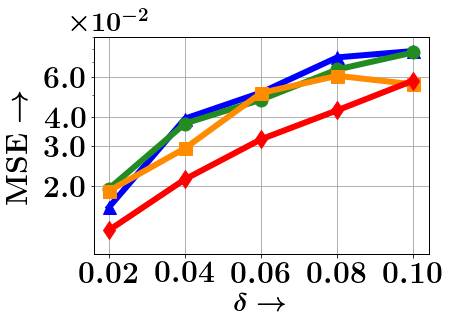

In [ ]:
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended 
!apt install cm-super
!pip install brewer2mpl

import pickle

##FOR DELTA

#from Util import *

#dataset = 'cadata'
dataset = 'LawSchool'

#file=dataset
file = '/content/LawSchool_delta.pkl'
#file = '/content/cadata_delta.pkl'
ts_size = {'cadata':2064, 'LawSchool':2080, 'MSD': 51630, 'NY_Stock_exchange_close': 78084,
          'NY_Stock_exchange_high':78084}

nn = ts_size[dataset]
openfile = open(file, "rb")
score_dict = pickle.load(openfile)
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
color_list = bmap.mpl_colors
color_list = [(0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
             (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
             (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
             (1.0, 0.8509803921568627, 0.1843137254901961),
             (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
             (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

color_list = [(1, 0, 0),
             (0, 0, 1),
              (0,0,0),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0,0,0),
#              (0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),]



def latexify():
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bbm}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amssymb}"]


    plt.rc('axes', linewidth=1)
    plt.rc('font', weight='bold')
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

 

# methods = ['Full-selection', 'Full-with-constraints', 'Random',\
#             'Random-with-constraints', 'CRAIG', 'GLISTER', 'SELCON-without-constraints',\
#             'SELCON']
score_dict['Delta']
score_dict['mean_error'].keys()
methods = ['Full', 'Full with Constraints', 'Random',\
            'Random with Constraints', 'CRAIG', 'GLISTER', 'SELCON without Constraints',\
            'SELCON']
# 'Random with Constraints', 'SELCON', 'Random', 
#'CRAIG', 'GLISTER', 'SELCON without Constraints', 'Full with Constraints', 'Full'

# score_dict['mean_error']['diff_SEAL']
#methods = ['Full', 'Full with Constraints', 'Random',\
#            'Random with Constraints', 'CRAIG', 'GLISTER', 'SELCON without Constraints',\
#            'SELCON']

methods = ['3\%','7\%','10\%','Full']

label_map=[r'\textbf{$\frac{|\mathcal{S}|}{|\mathcal{D}|} =$ '+i+'}'  for i in methods]

color_list = ['darkturquoise','forestgreen','mediumvioletred','darkorange',
            (0,0,0),(0,0.576, 0.68),(0, 0, 1), (1, 0, 0),'gold',
            (1.0, 0.8509803921568627, 0.1843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
            (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
            (0.4, 0.7607843137254902, 0.6470588235294118),
            (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
            (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
            (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),]

color_list = [(0, 0, 1),'forestgreen','darkorange',(1, 0, 0),'gray', 'darkturquoise',
            'gold',(0,0,0),'purple',
            (1.0, 0.8509803921568627, 0.1843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
            (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
            (0.4, 0.7607843137254902, 0.6470588235294118),
            (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
            (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
            (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),]
marker_list = ['^','o','s','d','p','X','*','v',] 
 

import numpy as np
latexify()

select = [1,3,5,7,9]

i=-1
fig, ax = plt.subplots()
for baseline in methods:# score_dict['mean_error'].keys():
  
    i=i+1
 
    '''if baseline == 'SELCON': 
        ax.errorbar(score_dict['S'],score_dict['mean_error'][baseline],score_dict['std_dev'][baseline]/np.sqrt(nn),\
            linewidth=6, markersize=13, marker= marker_list[i],color=color_list[i])
    else:
        if dataset == 'LawSchool':
              score_dict['mean_error'][baseline]\
                = np.convolve(score_dict['mean_error'][baseline], np.ones(3), 'valid') / 3
              score_dict['mean_error'][baseline]\
                =np.append(score_dict['mean_error'][baseline],score_dict['mean_error'][baseline][-1])
              score_dict['mean_error'][baseline]\ 
                =np.append(score_dict['mean_error'][baseline],score_dict['mean_error'][baseline][-1])
    '''       
    '''ax.errorbar(score_dict['Delta'][select],score_dict['mean_error'][baseline][select],\
                    score_dict['std_dev'][baseline][select]/np.sqrt(nn),linewidth=6,\
                    markersize=13, marker= marker_list[i],color=color_list[i])''' #linestyle='dashed',

    ax.plot(score_dict['Delta'][select],score_dict['mean_error'][baseline][select],\
                    label=label_map[i],linewidth=6,\
                    markersize=13, marker= marker_list[i],color=color_list[i])

plt.xlabel(r'\textbf{$\delta$} $\rightarrow$', fontsize=27)


#ax.legend(prop={'size': 28}, frameon=False,handlelength=0.4,loc='center left',bbox_to_anchor=(-1., 0.5))

plt.ylabel(r'$\mathrm{MSE}\rightarrow$ ', fontsize=30, labelpad=10)

plt.yscale("log")
plt.grid(axis='y',linestyle='-', linewidth=1)
plt.grid(axis='x',linestyle='-', linewidth=1)

if dataset == 'LawSchool':
  plt.xticks(score_dict['Delta'][select])
  plt.yticks([6e-2, 4e-2,3e-2,2e-2,],[r'\textbf{6.0}',r'\textbf{4.0}',r'\textbf{3.0}',r'\textbf{2.0}'])
  plt.text(0.01, 10e-2, r'$ \times 10^{-2}$', fontsize=27)
  plt.ylim(bottom=1.0e-2,top=9e-2)
elif dataset == 'cadata':
  plt.xticks(score_dict['Delta'][select])
  #plt.yticks([14e-2,10e-2,6e-2],[r'\textbf{1.4}',r'\textbf{1.0}',r'\textbf{0.6}'])
  #plt.text(0.1, 1, r'$ \times 10^{-1}$', fontsize=27)
  #plt.ylim(bottom=5.5e-2,top=0.16)
  plt.yticks([8e-1,6e-1,4e-1],[r'\textbf{0.8}',r'\textbf{0.6}',r'\textbf{0.4}'])

plt.box(on=True)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

#     ax.set_title(r'\textbf{Gain} = $\textbf{AP}($\textsc{PermGNN})-$\textbf{AP}($\textbf{baseline})', fontsize=19)
pic = dataset+"_delta.pdf"
plt.savefig(pic, bbox_inches='tight')



Reading package lists... Done
Building dependency tree       
Reading state information... Done
dvipng is already the newest version (1.15-1).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


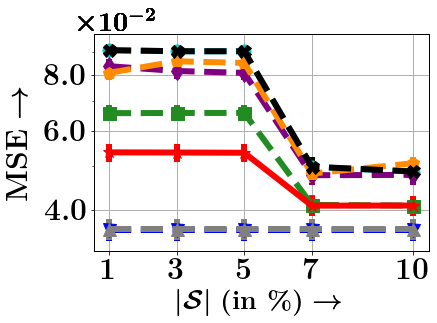

In [ ]:
###figure 2--- drill down analysis--- improvement of performance in terms of gain
#from Util import *

! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended 
!apt install cm-super
!pip install brewer2mpl

import pickle

#dataset = 'cadata'
#dataset = 'LawSchool'
#dataset = 'MSD'
#dataset = 'NY_Stock_exchange_high'
#dataset = 'NY_Stock_exchange_close'

datasets = ['cadata','MSD','NY_Stock_exchange_high','NY_Stock_exchange_close']
files = ['/content/cadata.pkl','/content/MSD.pkl','/content/NY_Stock_exchange_high.pkl','/content/NY_Stock_exchange_close.pkl']

d = 0

file = files[d]
dataset = datasets[d]
#print(dataset)

#file=dataset
ts_size = {'cadata':2064, 'LawSchool':2080, 'MSD': 51630, 'NY_Stock_exchange_close': 78084,
          'NY_Stock_exchange_high':78084}
nn = ts_size[dataset]

openfile = open(file, "rb")
score_dict = pickle.load(openfile)

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
color_list = bmap.mpl_colors
color_list = [(0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
             (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
             (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
             (1.0, 0.8509803921568627, 0.1843137254901961),
             (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
             (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

color_list = [(1, 0, 0),
             (0, 0, 1),
              (0,0,0),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0,0,0),
#              (0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),]



def latexify():
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bbm}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amssymb}"]


    plt.rc('axes', linewidth=1)
    plt.rc('font', weight='bold')
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

 

# methods = ['Full-selection', 'Full-with-constraints', 'Random',\
#             'Random-with-constraints', 'CRAIG', 'GLISTER', 'SELCON-without-constraints',\
#             'SELCON']
score_dict['S']
score_dict['mean_error'].keys()
methods = ['Full', 'Full with Constraints', 'Random',\
            'Random with Constraints', 'CRAIG', 'GLISTER', 'SELCON without Constraints',\
            'SELCON']
# 'Random with Constraints', 'SELCON', 'Random', 
#'CRAIG', 'GLISTER', 'SELCON without Constraints', 'Full with Constraints', 'Full'

# score_dict['mean_error']['diff_SEAL']
methods = ['Full', 'Full with Constraints', 'Random',\
            'Random with Constraints', 'CRAIG', 'GLISTER', 'SELCON without Constraints',\
            'SELCON']

color_list = ['darkturquoise','forestgreen','mediumvioletred','darkorange',
            (0,0,0),(0,0.576, 0.68),(0, 0, 1), (1, 0, 0),'gold',
            (1.0, 0.8509803921568627, 0.1843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
            (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
            (0.4, 0.7607843137254902, 0.6470588235294118),
            (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
            (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
            (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),]

color_list = [(0, 0, 1),'gray', 'darkturquoise','forestgreen','purple','darkorange',
            (0,0,0),(1, 0, 0),'gold',
            (1.0, 0.8509803921568627, 0.1843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
            (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
            (0.4, 0.7607843137254902, 0.6470588235294118),
            (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
            (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
            (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),]
marker_list = ['v','^','o','s','d','p','X','*'] 
 

import numpy as np
latexify()

i=-1
fig, ax = plt.subplots()
for baseline in methods:# score_dict['mean_error'].keys():
    i=i+1
 
    if baseline == 'SELCON': 
        ax.errorbar(score_dict['S'],score_dict['mean_error'][baseline],score_dict['std_dev'][baseline]/np.sqrt(nn),\
            linewidth=6, 
                markersize=13, marker= marker_list[i],color=color_list[i])
    else:
        if dataset == 'LawSchool':
            score_dict['mean_error'][baseline]\
             = np.convolve(score_dict['mean_error'][baseline], np.ones(3), 'valid') / 3
            score_dict['mean_error'][baseline]\
             =np.append(score_dict['mean_error'][baseline],score_dict['mean_error'][baseline][-1])
            score_dict['mean_error'][baseline]\
             =np.append(score_dict['mean_error'][baseline],score_dict['mean_error'][baseline][-1])
            
        ax.errorbar(score_dict['S'],score_dict['mean_error'][baseline],score_dict['std_dev'][baseline]/np.sqrt(nn),\
            linewidth=6,linestyle='dashed',
                markersize=13, marker= marker_list[i],color=color_list[i])

    plt.xlabel(r'$|\mathcal{S}|$  \textbf{(in \%)} $\rightarrow$', fontsize=27)
 
 
    ax.legend(prop={'size': 22}, frameon=False,handlelength=0.4)

    plt.ylabel(r'$\mathrm{MSE}\rightarrow$ ', fontsize=30, labelpad=10)

    plt.yscale("log")
    plt.grid(axis='y',linestyle='-', linewidth=1)
    plt.grid(axis='x',linestyle='-', linewidth=1)

    if dataset is 'cadata':
        plt.xticks([1,3,5,7,10])
#         plt.yticks([0.05,0.08,0.11,0.14])
#        plt.yticks([6e-2,10e-2,12e-2,],[r'\textbf{6.00}',r'\textbf{11.0}',r'\textbf{14.0}'])
#        plt.text(0.08, 16e-2, r'$\mathrm{\times 10^{-2}}$', fontsize=27)
#         plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]

        plt.yticks([6e-1,4e-1,8e-1,],[r'\textbf{6.0}',r'\textbf{4.0}',r'\textbf{8.0}'])
        plt.text(0.08, 1.02, r'$\mathrm{\times 10^{-2}}$', fontsize=27)


    if dataset is 'LawSchool':
        plt.xticks([1,3,5,7,10])
#         plt.yticks([0,1,2,3,4],[r'\textbf{0.0}',r'\textbf{1.00}',r'\textbf{2.00}',r'\textbf{3.00}',r'\textbf{4.00}'])
#        plt.yticks([1e-2,1e-1,1],[r'\textbf{0.10}',r'\textbf{1.00}',r'\textbf{10.0}'])
#        plt.text(0.08, 4, r'$\mathrm{\times 10^{-2}}$', fontsize=27)
#         plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]


#         plt.yticks([1e-2,1e-1,1,1e1])

    if dataset is 'MSD':
        plt.xticks([0.1,0.3,0.5,0.7,1])
#         plt.yticks([0.5,0.75,1.00,1.25,1.50])
#        plt.yticks([6e-1, 8.83e-1,13e-1,],[r'\textbf{6.00}',r'\textbf{8.83}',r'\textbf{13.0}'])
#       plt.text(0.08, 16e-1, r'$\mathrm{\times 10^{-1}}$', fontsize=27)

        plt.yticks([2,1.9, 1],[r'',r'\textbf{1.9}',r'\textbf{1.0}']) #,r'\textbf{13.0}'
        #plt.text(0.08, 2.1, r'$\mathrm{\times 10^{-1}}$', fontsize=27)
#         plt.ylim(top=9e-4)

    if dataset is 'NY_Stock_exchange_high':
        plt.xticks([0.1,0.3,0.5,0.7,1])
#         plt.yticks([0,2e-5,4e-5,6e-5,8e-5],[r'\textbf{0.0}',r'\textbf{2.00}',r'\textbf{4.00}',r'\textbf{6.00}',r'\textbf{8.00}'])
#         plt.text(0.08, 8e-5, r'$ \times 10^{-5}$', fontsize=27)


    if dataset is 'NY_Stock_exchange_close':
        plt.xticks([0.1,0.3,0.5,0.7,1])
#        plt.yticks([1e-5,1e-4])
#         plt.yticks([0,2e-5,4e-5,6e-5,8e-5],[r'\textbf{0.0}',r'\textbf{2.00}',r'\textbf{4.00}',r'\textbf{6.00}',r'\textbf{8.00}'])
#         plt.text(0.08, 8e-5, r'$ \times 10^{-5}$', fontsize=27)
#         plt.ylim(top=9e-5)

    plt.box(on=True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

#     ax.set_title(r'\textbf{Gain} = $\textbf{AP}($\textsc{PermGNN})-$\textbf{AP}($\textbf{baseline})', fontsize=19)
    pic = dataset+"_acc.pdf"
    plt.savefig(pic, bbox_inches='tight')

In [ ]:
score_dict['mean_error'][baseline]
np.append(score_dict['mean_error'][baseline],score_dict['mean_error'][baseline][-1])

array([0.01390496, 0.01390496, 0.01390496, 0.01390496, 0.01390496])

/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


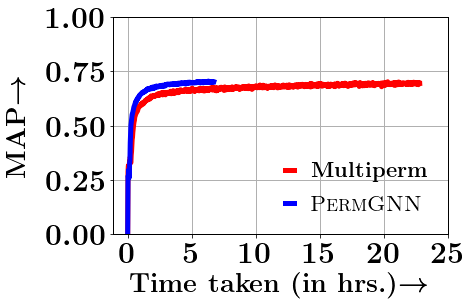

In [ ]:
#multiperm
###figure 2--- drill down analysis--- improvement of performance in terms of gain
from Util import *
file="permGNN_vs_multiperm_0.6"
score_dict = read_from_pickle(file)
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
color_list = bmap.mpl_colors
color_list = [(0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
             (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
             (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
             (1.0, 0.8509803921568627, 0.1843137254901961),
             (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
             (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

color_list = [(1, 0, 0),
             (0, 0, 1),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0,0,0),
#              (0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),]

def latexify():
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]
    plt.rc('axes', linewidth=1)
    plt.rc('font', weight='bold')
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
    
# dataset="Twitter_3"
dataset="Gplus_1"


# mp_binned = data['Twitter_3']['mp_binned'] 
# lp_binned = data['Twitter_3']['lp_binned'] 
# x_mp = data['Twitter_3']['x_mp'] 
# x_lp =  data['Twitter_3']['x_lp']  

latexify()

fig, ax = plt.subplots()


label_map=[r'\textbf{Multiperm}',r'\textsc{PermGNN}']    

ax.plot(score_dict[dataset]['x_mp'],score_dict[dataset]['mp_binned'], label=label_map[0], linewidth=5,
                markersize=4, color=color_list[0])


ax.plot(score_dict[dataset]['x_lp'],score_dict[dataset]['lp_binned'], label=label_map[1], linewidth=5,
                markersize=4, color=color_list[1])



#     plt.ylabel(r'\textbf{Gain} $\rightarrow$ ', fontsize=22, labelpad=-10)
plt.xlabel(r'\textbf{Time taken (in hrs.)}$\rightarrow$', fontsize=27)

if dataset is 'Twitter_3':
    plt.xticks(list(range(0,12,2)))
#     plt.ylim(top=1.1,bottom=-1.2)
    plt.ylabel(r'\textbf{MAP}$\rightarrow$', fontsize=27,labelpad=15)
    plt.ylim(top=1,bottom=0)
    plt.yticks([0,0.25,0.50,0.75,1])
    ax.legend(prop={'size': 22}, frameon=False,handlelength=0.4)


if dataset is 'Gplus_1':
    plt.xticks(list(range(0,30,5)))
    plt.ylim(top=1,bottom=0)
    plt.yticks([0,0.25,0.50,0.75,1])
    plt.ylabel(r'\textbf{MAP}$\rightarrow$', fontsize=27,labelpad=15)
    ax.legend(prop={'size': 22}, frameon=False,handlelength=0.4)

#     plt.ylim(top=1,bottom=-0.25)
#     plt.ylabel(r'\textbf{Gain} $\rightarrow$ ', fontsize=22, labelpad=-10)


plt.box(on=True)
plt.grid(axis='y',linestyle='-', linewidth=1)
plt.grid(axis='x',linestyle='-', linewidth=1)

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

file = "permGNNvsMultiPerm_"+dataset+".pdf"
plt.savefig(file, bbox_inches='tight')


In [ ]:
file="permGNN_vs_multiperm_0.6"
score_dict = read_from_pickle(file)
score_dict['Gplus_1']['x_mp'][-1]/score_dict['Gplus_1']['x_lp'][-1]
score_dict['Twitter_3']['x_mp'][-1]/score_dict['Twitter_3']['x_lp'][-1]

0.5

/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


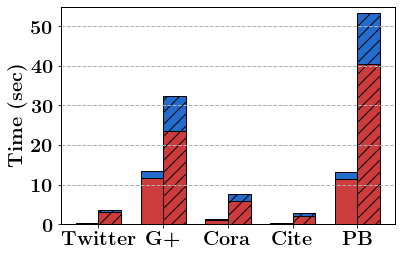

In [ ]:
import matplotlib
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
color_list = bmap.mpl_colors
color_list = [(0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
             (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
             (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
             (1.0, 0.8509803921568627, 0.1843137254901961),
             (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
             (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

color_list = [(205/255, 60/255, 60/255),
             (36/255, 107/255, 206/255),
             (41/255, 171/255, 135/255),
             (0,0,0),
#              (0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),]

def latexify_auc():
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]
    plt.rc('axes', linewidth=1)
    plt.rc('font', weight='bold')
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
N = 5
heapTime_hash = [0.14644885063171387,   11.556171417236328,   0.9843904972076416, 0.17343807220458984 , 11.366776704788208]
scoreTime_hash = [0.05268383026123047,  1.8811779022216797,   0.3023192882537842, 0.0867457389831543  , 1.8213188648223877]
heapTime_nohash = [2.933013677597046,   23.59122371673584,    5.829715251922607,  2.1387217044830322  , 40.49332904815674]
scoreTime_nohash = [0.6911599636077881, 8.793543338775635,    1.6854121685028076, 0.5785701274871826  , 12.874669551849365]

ind = np.arange(N)  
width = 0.35      
latexify_auc()
fig,ax=plt.subplots()
plt.grid(axis='y',linestyle='--', linewidth=1)
p1 = plt.bar(ind-width/2, heapTime_hash, width,color=color_list[0],edgecolor='k')
p2 = plt.bar(ind-width/2, scoreTime_hash, width,
             bottom=heapTime_hash,color=color_list[1],edgecolor='k')

p3 = plt.bar(ind+width/2, heapTime_nohash, width,color=color_list[0],hatch='//',edgecolor='k')
p4 = plt.bar(ind+width/2, scoreTime_nohash, width,
             bottom=heapTime_nohash,color=color_list[1],hatch='//',edgecolor='k')
plt.box(on=True)
Datasets = (r'\textbf{Twitter}', r'\textbf{G+}', r'\textbf{Cora}',
            r'\textbf{Cite}', r'\textbf{PB}')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
plt.ylabel(r'\textbf{Time (sec)}',fontsize=20)
plt.xticks(ind, Datasets,fontsize=20)
plt.yticks(np.arange(0, 51, 10),fontsize=20)
plt.ylim(top=55)
# legendList =(r'\textbf{Heap time (exhaustive)}',r'\textbf{Heap time (hashing)}',
#             r'\textbf{Score time (exhaustive)}',r'\textbf{Score time (hashing)}')
# plt.legend((p1[0], p3[0], p2[0], p4[0]), legendList,fontsize=13,frame3on=False)
plt.savefig('Hashing Link Prediction (Tensorized).png', bbox_inches='tight')
plt.savefig('Hashing Link Prediction (Tensorized).pdf', bbox_inches='tight')
plt.show()

/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


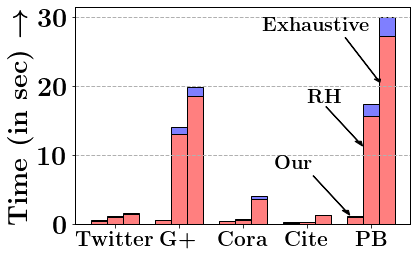

In [ ]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
color_list = bmap.mpl_colors
color_list = [(0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
             (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
             (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
             (1.0, 0.8509803921568627, 0.1843137254901961),
             (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
             (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

color_list = [(1, 127/255, 127/255),
             (127/255, 127/255, 255/255),
             (41/255, 171/255, 135/255),
             (0,0,0),
#              (0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),]

def latexify_auc():
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]
    plt.rc('axes', linewidth=1)
    plt.rc('font', weight='bold')
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
N = 5
heapTime_trained_hash =  [ 0.016140222549438477, 0.045851707458496094, 0.07123684883117676, 0.027500629425048828, 0.12169933319091797]
scoreTime_trained_hash = [ 0.529367208480835,   0.5365421772003174,   0.4384338855743408, 0.245070219039917, 1.100022792816162 ]
heapTime_random_hash =   [ 0.06658029556274414, 1.034360647201538 ,  0.10037803649902344 , 0.030590534210205078, 1.7468006610870361]
scoreTime_random_hash =  [ 1.1059238910675049, 13.004356622695923,   0.5956313610076904 , 0.28761863708496094, 15.60985255241394 ]
heapTime_nohash =        [ 0.0421900749206543,  1.3474986553192139,  0.533517599105835  , 0.11999225616455078 , 2.6674864292144775]
scoreTime_nohash =       [ 1.52616286277771, 18.505757093429565,  3.6037936210632324, 1.2707641124725342, 27.293021202087402]


ind = np.arange(N)  
width = 0.25   
latexify_auc()
fig,ax=plt.subplots()
plt.grid(axis='y',linestyle='--', linewidth=1)
p1 = plt.bar(ind-width, scoreTime_trained_hash, width,color=color_list[0],edgecolor='k')
p2 = plt.bar(ind-width, heapTime_trained_hash, width,
             bottom=scoreTime_trained_hash,color=color_list[1],edgecolor='k')

p3 = plt.bar(ind, scoreTime_random_hash, width,color=color_list[0],edgecolor='k')
p4 = plt.bar(ind, heapTime_random_hash, width,
             bottom=scoreTime_random_hash,color=color_list[1],edgecolor='k')


p5 = plt.bar(ind+width, scoreTime_nohash, width,color=color_list[0],edgecolor='k')
p6 = plt.bar(ind+width, heapTime_nohash, width,
             bottom=scoreTime_nohash,color=color_list[1],edgecolor='k')
plt.box(on=True)
Datasets = (r'\textbf{Twitter}', r'\textbf{G+}', r'\textbf{Cora}',
            r'\textbf{Cite}', r'\textbf{PB}')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
# plt.ylabel(r'\textbf{Time (sec)}',fontsize=20)
plt.xticks(ind, Datasets,fontsize=21)
plt.yticks(np.arange(0, 40, 10),fontsize=27)
plt.ylabel(r'\textbf{Time (in sec) $\to$}',fontsize=27)

# plt.ylim(top=1.6)
# legendList =(r'\textbf{Heap time (hashing)}',r'\textbf{Heap time (exhaustive)}',
#             r'\textbf{Score time (hashing)}',r'\textbf{Score time (exhaustive)}')
# plt.legend((p1[0], p3[0], p5[0], p2[0], p4[0], p6[0]), legendList,fontsize=16,frameon=False)

a=0.1
f=7
plt.arrow(3.1,7,0.5,-5,length_includes_head=False, width=0.01,head_width=a,head_length=a*f,facecolor=None,linestyle='-',color='k')
plt.text(2.5, 8, r'\textbf{Our}', fontsize=20)

plt.arrow(3.3,17,0.5,-5,length_includes_head=False, width=0.01,head_width=a,head_length=a*f,facecolor=None,linestyle='-',color='k')
plt.text(3.0, 17.6, r'\textbf{RH}', fontsize=20)

plt.arrow(3.6,27,0.5,-6,length_includes_head=False, width=0.01,head_width=a,head_length=0.7*a*f,facecolor=None,linestyle='-',color='k')
plt.text(2.3, 28, r'\textbf{Exhaustive}', fontsize=20)

plt.savefig('Hashing Link Prediction (Non Tensorized).png', bbox_inches='tight')
plt.savefig('Hashing Link Prediction (Non Tensorized).pdf', bbox_inches='tight')


plt.show()

/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


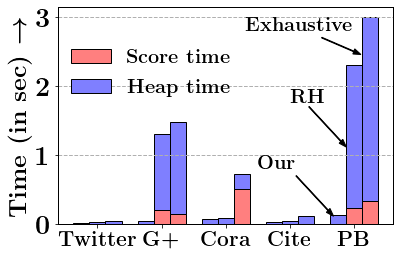

In [ ]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
color_list = bmap.mpl_colors
color_list = [(0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
             (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
             (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
             (1.0, 0.8509803921568627, 0.1843137254901961),
             (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
             (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

color_list = [(1, 127/255, 127/255),
             (127/255, 127/255, 255/255),
             (41/255, 171/255, 135/255),
             (0,0,0),
#              (0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),]

def latexify_auc():
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]
    plt.rc('axes', linewidth=1)
    plt.rc('font', weight='bold')
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
N = 5
heapTime_trained_hash =  [ 0.014214038848876953, 0.04388022422790527 ,0.07710003852844238 ,0.03179216384887695 , 0.12677931785583496]
scoreTime_trained_hash = [ 0.0014579296112060547 , 0.0016102790832519531, 0.0018801689147949219, 0.0013000965118408203, 0.0036110877990722656]
heapTime_random_hash =   [ 0.024416685104370117, 1.10201096534729,  0.0902707576751709 , 0.04187798500061035, 2.060154914855957]
scoreTime_random_hash =  [ 0.0024712085723876953,0.2102060317993164 , 0.0024230480194091797 ,0.0023763179779052734 , 0.23766374588012695]
heapTime_nohash =        [ 0.044992923736572266 ,1.3333933353424072 , 0.20686626434326172, 0.1085364818572998,2.6674246788024902 ]
scoreTime_nohash =       [ 0.00434112548828125 ,  0.15255284309387207, 0.5136775970458984, 0.0047152042388916016, 0.32903385162353516 ]



ind = np.arange(N)  
width = 0.25   
latexify_auc()
fig,ax=plt.subplots()
plt.grid(axis='y',linestyle='--', linewidth=1)
p1 = plt.bar(ind-width, scoreTime_trained_hash, width,color=color_list[0],edgecolor='k')
p2 = plt.bar(ind-width, heapTime_trained_hash, width,
             bottom=scoreTime_trained_hash,color=color_list[1],edgecolor='k')

p3 = plt.bar(ind, scoreTime_random_hash, width,color=color_list[0],edgecolor='k')
p4 = plt.bar(ind, heapTime_random_hash, width,
             bottom=scoreTime_random_hash,color=color_list[1],edgecolor='k')


p5 = plt.bar(ind+width, scoreTime_nohash, width,color=color_list[0],edgecolor='k')
p6 = plt.bar(ind+width, heapTime_nohash, width,
             bottom=scoreTime_nohash,color=color_list[1],edgecolor='k')

# p1 = plt.bar(ind-width, scoreTime_trained_hash, width,color=color_list[0],edgecolor='k')
# p2 = plt.bar(ind-width, heapTime_trained_hash, width,
#              bottom=scoreTime_trained_hash,color=color_list[1],edgecolor='k')

# p3 = plt.bar(ind, scoreTime_random_hash, width,color=color_list[0],edgecolor='k',hatch='x')
# p4 = plt.bar(ind, heapTime_random_hash, width,
#              bottom=scoreTime_random_hash,color=color_list[1],edgecolor='k',hatch='x')


# p5 = plt.bar(ind+width, scoreTime_nohash, width,color=color_list[0],hatch='//',edgecolor='k')
# p6 = plt.bar(ind+width, heapTime_nohash, width,
#              bottom=scoreTime_nohash,color=color_list[1],hatch='//',edgecolor='k')
plt.box(on=True)
Datasets = (r'\textbf{Twitter}', r'\textbf{G+}', r'\textbf{Cora}',
            r'\textbf{Cite}', r'\textbf{PB}')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
# plt.ylabel(r'\textbf{Time (sec)}',fontsize=20)
plt.xticks(ind, Datasets,fontsize=21)
plt.yticks(np.arange(0, 5, 1),fontsize=27)
plt.ylabel(r'\textbf{Time (in sec) $\to$}',fontsize=25)

plt.arrow(3.1,0.7,0.5,-0.5,length_includes_head=False, width=0.01,head_width=0.08,facecolor=None,linestyle='-',color='k')
plt.text(2.5, 0.8, r'\textbf{Our}', fontsize=20)

plt.arrow(3.3,1.7,0.5,-0.5,length_includes_head=False, width=0.01,head_width=0.08,facecolor=None,linestyle='-',color='k')
plt.text(3.0, 1.76, r'\textbf{RH}', fontsize=20)

plt.arrow(3.5,2.7,0.5,-0.2,length_includes_head=False, width=0.01,head_width=0.08,facecolor=None,linestyle='-',color='k')
plt.text(2.3, 2.8, r'\textbf{Exhaustive}', fontsize=20)

# plt.ylim(top=1.6)
# legendList =(r'\textbf{Heap time (our)}',r'\textbf{Heap time (RH)}',r'\textbf{Heap time (no-hash)}',
#              r'\textbf{Score time (our)}', r'\textbf{Score time (RH)}',r'\textbf{Score time (exhaustive)}')
# plt.legend((p1[0], p3[0], p5[0], p2[0], p4[0], p6[0]), legendList,fontsize=16,frameon=True,
#            loc='upper right', bbox_to_anchor=(0.8, 1.2))
legendList =(r'\textbf{Score time}',
             r'\textbf{Heap time}')
plt.legend((p1[0],p2[0]),legendList,fontsize=20,frameon=False,loc='upper right', bbox_to_anchor=(0.57, 0.9))
plt.savefig('Hashing Link Prediction (Tensorized) arrow.png', bbox_inches='tight')
plt.savefig('Hashing Link Prediction (Tensorized) arrow.pdf', bbox_inches='tight')
plt.show()

/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


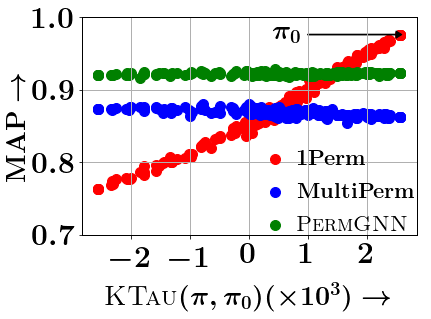

In [ ]:
##perm. invar. for cora
from Util import *

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
color_list = bmap.mpl_colors
color_list = [(0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
             (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
             (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
             (1.0, 0.8509803921568627, 0.1843137254901961),
             (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
             (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

color_list = [(1, 0, 0),
             (0, 0, 1),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0,0,0),
#              (0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),]

def latexify():
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]
    plt.rc('axes', linewidth=1)
    plt.rc('font', weight='bold')
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
    matplotlib.rcParams['lines.markersize']=10 

    
latexify()
fig, ax = plt.subplots()
    
fp = "cora_golbal_perm_data"  
data = read_from_pickle(fp)
map_list = data['map_list']
ktau_list = data['ktau_list']
embeds_sens_list = data['embeds_sens_list']

label_map=[r'\textbf{1Perm}',r'\textbf{MultiPerm}', r'\textsc{PermGNN}']    

plt.scatter(ktau_list["LP_LSTMonly_enforceSorted"], map_list["LP_LSTMonly_enforceSorted"], label=label_map[0], c="r")
plt.scatter(ktau_list["LP_LSTMonly_multipermTrain"], map_list["LP_LSTMonly_multipermTrain"], label=label_map[1], c="b")
plt.scatter(ktau_list["LP"], map_list["LP"], label=label_map[2],c="g")


 

plt.xticks(list(range(-2000,3000,1000)))
ax.set_xticklabels([r'${-2}$',r'$-1$',r'$0$',r'$1$',r'$2$'])


# plt.ylim(top=1.1,bottom=-1.2)
# plt.yticks([-1,-0.5,0,0.5,1])
plt.ylabel(r'\textbf{MAP} $ \rightarrow$ ', fontsize=27, labelpad=1)
plt.xlabel(r'${\textsc{KTau}}(\pi,\pi_0) (\times 10^{3}) \rightarrow$', fontsize=27, labelpad=15)

ax.legend(prop={'size': 22}, frameon=False,handlelength=0.4,loc='upper right', bbox_to_anchor=(1.055, 0.49))

plt.grid(axis='y',linestyle='-', linewidth=1)
plt.grid(axis='x',linestyle='-', linewidth=1)

plt.box(on=True)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

plt.arrow(1000,0.976,2500-1000,0,length_includes_head=False, width=0.001,head_width=0.01,head_length=100,facecolor=None,linestyle='-',color='k')
plt.text(400, 0.97, r'$\pi_0$', fontsize=27)

plt.yticks([0.7,0.8,0.9,1])

file = "map_vs_ktau_cora.pdf"
plt.savefig(file, bbox_inches='tight')


/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


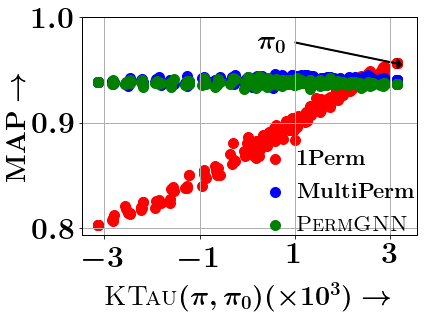

In [ ]:
#perm. invariance for citeseer.
from Util import *

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
color_list = bmap.mpl_colors
color_list = [(0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
             (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
             (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
             (1.0, 0.8509803921568627, 0.1843137254901961),
             (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
             (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

color_list = [(1, 0, 0),
             (0, 0, 1),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0,0,0),
#              (0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),]

def latexify():
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]
    plt.rc('axes', linewidth=1)
    plt.rc('font', weight='bold')
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
    matplotlib.rcParams['lines.markersize']=10 

    
latexify()
fig, ax = plt.subplots()
    
fp = "citeseer_golbal_perm_data"  
data = read_from_pickle(fp)
map_list = data['map_list']
ktau_list = data['ktau_list']
embeds_sens_list = data['embeds_sens_list']

label_map=[r'\textbf{1Perm}',r'\textbf{MultiPerm}', r'\textsc{PermGNN}']    

plt.scatter(ktau_list["LP_LSTMonly_enforceSorted"], map_list["LP_LSTMonly_enforceSorted"], label=label_map[0], c="r")
plt.scatter(ktau_list["LP_LSTMonly_multipermTrain"], map_list["LP_LSTMonly_multipermTrain"], label=label_map[1], c="b")
plt.scatter(ktau_list["LP"], map_list["LP"], label=label_map[2],c="g")


 

plt.xticks(list(range(-3000,4000,2000)))
ax.set_xticklabels([r'${-3}$',r'$-1$',r'$1$',r'$3$'])


# plt.ylim(top=1.1,bottom=-1.2)
# plt.yticks([-1,-0.5,0,0.5,1])
plt.ylabel(r'\textbf{MAP} $ \rightarrow$ ', fontsize=27, labelpad=1)
plt.xlabel(r'${\textsc{KTau}}(\pi,\pi_0) (\times 10^{3}) \rightarrow$', fontsize=27, labelpad=15)

ax.legend(prop={'size': 22}, frameon=False,handlelength=0.4,loc='upper right', bbox_to_anchor=(1.055, 0.49))

plt.grid(axis='y',linestyle='-', linewidth=1)
plt.grid(axis='x',linestyle='-', linewidth=1)

plt.box(on=True)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

plt.arrow(1000,0.976,3139-1000,-0.02,length_includes_head=False, width=0.001,head_width=0.01,head_length=100,facecolor=None,linestyle='-',color='k')
plt.text(200, 0.97, r'$\pi_0$', fontsize=27)

plt.yticks([0.8,0.9,1])

file = "map_vs_ktau_citeseer.pdf"
plt.savefig(file, bbox_inches='tight')


/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


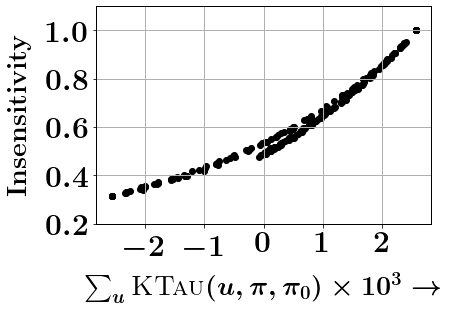

In [ ]:
from Util import *

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
color_list = bmap.mpl_colors
color_list = [(0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
             (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
             (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
             (1.0, 0.8509803921568627, 0.1843137254901961),
             (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
             (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

color_list = [(1, 0, 0),
             (0, 0, 1),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0,0,0),
#              (0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),]

def latexify():
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]
    plt.rc('axes', linewidth=1)
    plt.rc('font', weight='bold')
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

    
latexify()
fig, ax = plt.subplots()
    
fp = "cora_golbal_perm_data_feat"  
data = read_from_pickle(fp)
map_list = data['map_list']
ktau_list = data['ktau_list']
embeds_sens_list = data['embeds_sens_list']

label_map=[r'\textbf{1Perm}',r'\textbf{MultiPerm}', r'\textsc{PermGNN}']    

ktau_list = data['ktau_list']
inputs_sens_list = data['inputs_sens_list']
lstm_op_sens_list =  data['lstm_op_sens_list']  
embeds_sens_list = data['embeds_sens_list'] 


plt.scatter(ktau_list['LP'], inputs_sens_list['LP'], label=label_map[0], c="k")
# plt.scatter(ktau_list, lstm_op_sens_list, label=label_map[1], c="b")
# plt.scatter(ktau_list,embeds_sens_list, label=label_map[2],c="g")


 

plt.xticks(list(range(-2000,3000,1000)))
ax.set_xticklabels([r'${-2}$',r'$-1$',r'$0$',r'$1$',r'$2$'])

plt.ylim(top=1.1)
# plt.yticks([-1,-0.5,0,0.5,1])
plt.ylabel(r'\textbf{Insensitivity}', fontsize=27, labelpad=15)
plt.xlabel(r'$\sum_u{\textsc{KTau}}(u,\pi,\pi_0) \times 10^{3} \rightarrow$', fontsize=27, labelpad=15)

# ax.legend(prop={'size': 22}, frameon=False,handlelength=0.4,loc='upper right', bbox_to_anchor=(1.055, 0.49))

plt.grid(axis='y',linestyle='-', linewidth=1)
plt.grid(axis='x',linestyle='-', linewidth=1)

plt.box(on=True)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# plt.arrow(1000,0.976,2500-1000,0,length_includes_head=False, width=0.001,head_width=0.01,head_length=100,facecolor=None,linestyle='-',color='k')
# plt.text(400, 0.97, r'$\pi_0$', fontsize=27)

plt.yticks([0.2,0.4,0.6,0.8,1])

file = "feat_vs_ktau_cora.pdf"
plt.savefig(file, bbox_inches='tight')


/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


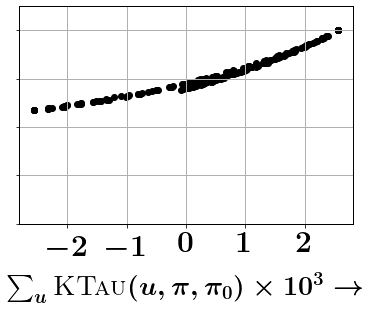

In [ ]:
from Util import *

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
color_list = bmap.mpl_colors
color_list = [(0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
             (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
             (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
             (1.0, 0.8509803921568627, 0.1843137254901961),
             (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
             (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

color_list = [(1, 0, 0),
             (0, 0, 1),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0,0,0),
#              (0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),]

def latexify():
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]
    plt.rc('axes', linewidth=1)
    plt.rc('font', weight='bold')
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

    
latexify()
fig, ax = plt.subplots()
    
fp = "cora_golbal_perm_data_feat"  
data = read_from_pickle(fp)
map_list = data['map_list']
ktau_list = data['ktau_list']
embeds_sens_list = data['embeds_sens_list']

label_map=[r'\textbf{1Perm}',r'\textbf{MultiPerm}', r'\textsc{PermGNN}']    

ktau_list = data['ktau_list']
inputs_sens_list = data['inputs_sens_list']
lstm_op_sens_list =  data['lstm_op_sens_list']  
embeds_sens_list = data['embeds_sens_list'] 


# plt.scatter(ktau_list['LP'], inputs_sens_list['LP'], label=label_map[0], c="k")
plt.scatter(ktau_list['LP'], lstm_op_sens_list['LP'], label=label_map[0], c="k")
# plt.scatter(ktau_list,embeds_sens_list, label=label_map[2],c="g")

plt.ylim(top=1.1)

 
plt.yticks([0.2,0.4,0.6,0.8,1])
ax.set_yticklabels([r'$ $',r'$ $',r'$ $',r'$ $',r'$ $'])

plt.xticks(list(range(-2000,3000,1000)))
ax.set_xticklabels([r'${-2}$',r'$-1$',r'$0$',r'$1$',r'$2$'])


# plt.ylim(top=1.1,bottom=-1.2)
# plt.yticks([-1,-0.5,0,0.5,1])
# plt.ylabel(r'\textbf{Insensitivity}', fontsize=27, labelpad=15)
plt.xlabel(r'$\sum_u{\textsc{KTau}}(u,\pi,\pi_0) \times 10^{3} \rightarrow$', fontsize=27, labelpad=15)

# ax.legend(prop={'size': 22}, frameon=False,handlelength=0.4,loc='upper right', bbox_to_anchor=(1.055, 0.49))

plt.grid(axis='y',linestyle='-', linewidth=1)
plt.grid(axis='x',linestyle='-', linewidth=1)

plt.box(on=True)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# plt.arrow(1000,0.976,2500-1000,0,length_includes_head=False, width=0.001,head_width=0.01,head_length=100,facecolor=None,linestyle='-',color='k')
# plt.text(400, 0.97, r'$\pi_0$', fontsize=27)


file = "y_vs_ktau_cora.pdf"
plt.savefig(file, bbox_inches='tight')


/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


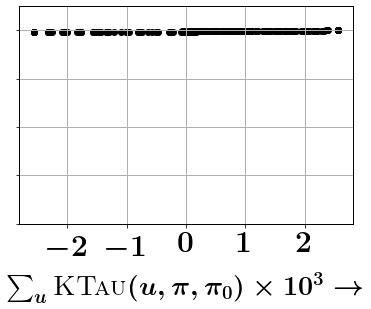

In [ ]:
from Util import *

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
color_list = bmap.mpl_colors
color_list = [(0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
             (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
             (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
             (1.0, 0.8509803921568627, 0.1843137254901961),
             (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
             (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

color_list = [(1, 0, 0),
             (0, 0, 1),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0,0,0),
#              (0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),]

def latexify():
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]
    plt.rc('axes', linewidth=1)
    plt.rc('font', weight='bold')
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

    
latexify()
fig, ax = plt.subplots()
    
fp = "cora_golbal_perm_data_feat"  
data = read_from_pickle(fp)
map_list = data['map_list']
ktau_list = data['ktau_list']
embeds_sens_list = data['embeds_sens_list']

label_map=[r'\textbf{1Perm}',r'\textbf{MultiPerm}', r'\textsc{PermGNN}']    

ktau_list = data['ktau_list']
inputs_sens_list = data['inputs_sens_list']
lstm_op_sens_list =  data['lstm_op_sens_list']  
embeds_sens_list = data['embeds_sens_list'] 


# plt.scatter(ktau_list['LP'], inputs_sens_list['LP'], label=label_map[0], c="k")
plt.scatter(ktau_list['LP'], embeds_sens_list['LP'], label=label_map[0], c="k")


 
plt.yticks([0.2,0.4,0.6,0.8,1])
ax.set_yticklabels([r'$ $',r'$ $',r'$ $',r'$ $',r'$ $'])

plt.xticks(list(range(-2000,3000,1000)))
ax.set_xticklabels([r'${-2}$',r'$-1$',r'$0$',r'$1$',r'$2$'])


# plt.ylim(top=1.1,bottom=-1.2)
# plt.yticks([-1,-0.5,0,0.5,1])
# plt.ylabel(r'\textbf{Insensitivity}', fontsize=27, labelpad=15)
plt.xlabel(r'$\sum_u{\textsc{KTau}}(u,\pi,\pi_0) \times 10^{3} \rightarrow$', fontsize=27, labelpad=15)

# ax.legend(prop={'size': 22}, frameon=False,handlelength=0.4,loc='upper right', bbox_to_anchor=(1.055, 0.49))

plt.grid(axis='y',linestyle='-', linewidth=1)
plt.grid(axis='x',linestyle='-', linewidth=1)

plt.box(on=True)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# plt.arrow(1000,0.976,2500-1000,0,length_includes_head=False, width=0.001,head_width=0.01,head_length=100,facecolor=None,linestyle='-',color='k')
# plt.text(400, 0.97, r'$\pi_0$', fontsize=27)
plt.ylim(top=1.1)


file = "x_vs_ktau_cora.pdf"
plt.savefig(file, bbox_inches='tight')


/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


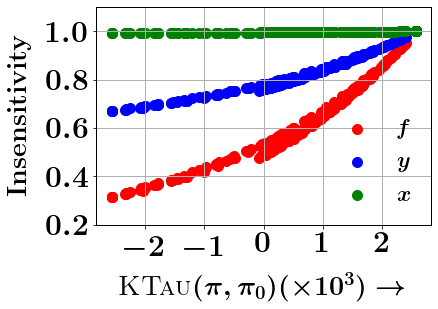

In [ ]:
from Util import *

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
color_list = bmap.mpl_colors
color_list = [(0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
             (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
             (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
             (1.0, 0.8509803921568627, 0.1843137254901961),
             (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
             (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

color_list = [(1, 0, 0),
             (0, 0, 1),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0,0,0),
#              (0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),]

def latexify():
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]
    plt.rc('axes', linewidth=1)
    plt.rc('font', weight='bold')
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
    matplotlib.rcParams['lines.markersize']=10 

    
latexify()
fig, ax = plt.subplots()
    
fp = "cora_golbal_perm_data_feat"  
fp = "cora_golbal_perm_data_feat"  

data = read_from_pickle(fp)
map_list = data['map_list']
ktau_list = data['ktau_list']
embeds_sens_list = data['embeds_sens_list']

label_map=[r'$f$',r'$y$', r'$x$']    

ktau_list = data['ktau_list']
inputs_sens_list = data['inputs_sens_list']
lstm_op_sens_list =  data['lstm_op_sens_list']  
embeds_sens_list = data['embeds_sens_list'] 


plt.scatter(ktau_list['LP'], inputs_sens_list['LP'], label=label_map[0], c="r")
# plt.scatter(ktau_list, lstm_op_sens_list, label=label_map[1], c="b")
# plt.scatter(ktau_list,embeds_sens_list, label=label_map[2],c="g")

plt.scatter(ktau_list['LP'], lstm_op_sens_list['LP'], label=label_map[1], c="b")
plt.scatter(ktau_list['LP'], embeds_sens_list['LP'], label=label_map[2], c="g")

 

plt.xticks(list(range(-2000,3000,1000)))
ax.set_xticklabels([r'${-2}$',r'$-1$',r'$0$',r'$1$',r'$2$'])

plt.ylim(top=1.1)
# plt.yticks([-1,-0.5,0,0.5,1])
plt.ylabel(r'\textbf{Insensitivity}', fontsize=27, labelpad=15)
plt.xlabel(r'${\textsc{KTau}}(\pi,\pi_0) (\times 10^{3}) \rightarrow$', fontsize=27, labelpad=15)

ax.legend(prop={'size': 22}, frameon=False)

plt.grid(axis='y',linestyle='-', linewidth=1)
plt.grid(axis='x',linestyle='-', linewidth=1)

plt.box(on=True)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# plt.arrow(1000,0.976,2500-1000,0,length_includes_head=False, width=0.001,head_width=0.01,head_length=100,facecolor=None,linestyle='-',color='k')
# plt.text(400, 0.97, r'$\pi_0$', fontsize=27)

plt.yticks([0.2,0.4,0.6,0.8,1])

file = "fyx_vs_ktau_cora.pdf"
plt.savefig(file, bbox_inches='tight')


/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/home/abir/sysPython/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


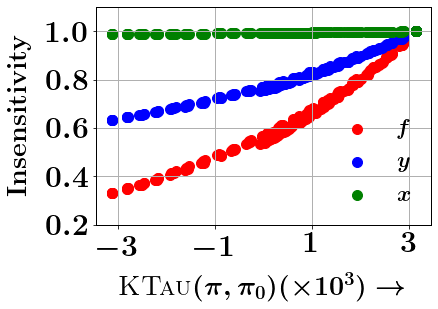

In [ ]:
from Util import *

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
color_list = bmap.mpl_colors
color_list = [(0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
             (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
             (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
             (1.0, 0.8509803921568627, 0.1843137254901961),
             (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
             (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

color_list = [(1, 0, 0),
             (0, 0, 1),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0,0,0),
#              (0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),]

def latexify():
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]
    matplotlib.rcParams['lines.markersize']=10 


    plt.rc('axes', linewidth=1)
    plt.rc('font', weight='bold')
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

    
latexify()
fig, ax = plt.subplots()
    
fp = "citeseer_golbal_perm_data"  

data = read_from_pickle(fp)
map_list = data['map_list']
ktau_list = data['ktau_list']
embeds_sens_list = data['embeds_sens_list']

label_map=[r'$f$',r'$y$', r'$x$']    

ktau_list = data['ktau_list']
inputs_sens_list = data['inputs_sens_list']
lstm_op_sens_list =  data['lstm_op_sens_list']  
embeds_sens_list = data['embeds_sens_list'] 


plt.scatter(ktau_list['LP'], inputs_sens_list['LP'], label=label_map[0], c="r")
# plt.scatter(ktau_list, lstm_op_sens_list, label=label_map[1], c="b")
# plt.scatter(ktau_list,embeds_sens_list, label=label_map[2],c="g")

plt.scatter(ktau_list['LP'], lstm_op_sens_list['LP'], label=label_map[1], c="b")
plt.scatter(ktau_list['LP'], embeds_sens_list['LP'], label=label_map[2], c="g")

plt.xticks(list(range(-3000,4000,2000)))
ax.set_xticklabels([r'${-3}$',r'$-1$',r'$1$',r'$3$'])


plt.ylim(top=1.1)
# plt.yticks([-1,-0.5,0,0.5,1])
plt.ylabel(r'\textbf{Insensitivity}', fontsize=27, labelpad=15)
plt.xlabel(r'${\textsc{KTau}}(\pi,\pi_0) (\times 10^{3}) \rightarrow$', fontsize=27, labelpad=15)

ax.legend(prop={'size': 22}, frameon=False)

plt.grid(axis='y',linestyle='-', linewidth=1)
plt.grid(axis='x',linestyle='-', linewidth=1)

plt.box(on=True)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# plt.arrow(1000,0.976,2500-1000,0,length_includes_head=False, width=0.001,head_width=0.01,head_length=100,facecolor=None,linestyle='-',color='k')
# plt.text(400, 0.97, r'$\pi_0$', fontsize=27)

plt.yticks([0.2,0.4,0.6,0.8,1])

file = "fyx_vs_ktau_citeseer.pdf"
plt.savefig(file, bbox_inches='tight')
